<a href="https://colab.research.google.com/github/secutron/ShowTime/blob/master/up_test5_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AutoEncoder


http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/DeepLearningBooklet.pdf?_ga=2.184768361.1553179602.1592730801-433090902.1592730801



In [1]:
!nvidia-smi

Fri Jul  3 06:00:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [4]:
!pip install h2o

import h2o
from h2o.automl import H2OAutoML

In [7]:
!pip install shap
import shap

     |████████████████████████████████| 276kB 8.3MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394118 sha256=8a2bd81a47aacf341c9949109089f43765fe688663c67f6ea10f7d0f8aa5a127
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import time
import itertools

from sklearn.metrics import confusion_matrix

import sys
import os

import warnings
warnings.filterwarnings("ignore")

In [17]:
#print('matplotlib: {}'.format(matplotlib.__version__))
#print('sklearn: {}'.format(sklearn.__version__))
#print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
#print('sys: {}'.format(sys.version))

seaborn: 0.10.1
pandas: 1.0.5
numpy: 1.18.5


In [18]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_drk192a
  JVM stdout: /tmp/tmp_drk192a/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_drk192a/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_p7hbwd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [19]:
# Get help
#help(h2o.estimators.glm.H2OGeneralizedLinearEstimator)
#help(h2o.estimators.gbm.H2OGradientBoostingEstimator)
#help(h2o.estimators.deeplearning.H2ODeepLearningEstimator)

# Show a demo
#h2o.demo("glm")
#h2o.demo("gbm")
#h2o.demo("deeplearning")

### 여러 파일 준비

In [20]:
BASE_DIR = '/content'
#OUTPUT_FILE = os.path.join(BASE_DIR, 'tmp.csv')

#hkim_data=urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', OUTPUT_FILE)

# 드라이브 전체공유 후..

# column_2C_weka.csv
#hkim_data=urllib.request.urlretrieve('https://drive.google.com/uc?export=download&id=1oMEvI6gWC4ZAqssQ3s3j6RkWUPa_TSwY', OUTPUT_FILE)

#churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [21]:
OUTPUT_FILE = os.path.join(BASE_DIR, 'QMS_NVOC_SORT.csv')
df = pd.read_csv(OUTPUT_FILE, delimiter = ',')
print(df.shape)
print(type(df))
df.dtypes


(2603543, 9)
<class 'pandas.core.frame.DataFrame'>


Unnamed: 0                 int64
a1.ucube_jnr_no           object
a2.firstlogtime           object
a2.buffer_overflow       float64
a2.pts_advanced_error    float64
a2.stb_rtp_errcnt        float64
a2.no_stream_error       float64
a2.not_decoding_error    float64
nvoc                       int64
dtype: object

In [22]:
df.head()

,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,nvoc
0,111744,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0
1,111745,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0
2,111746,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0
3,111747,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0
4,111748,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0


### 향후 편의를 위해 Ground-truth Class, normal, anomaly로 이름 변경

In [25]:
df.rename(columns={'nvoc':'Ground-truth Class'}, inplace=True)

df['Ground-truth Class'] = df['Ground-truth Class'].replace(0, 'normal')
df['Ground-truth Class'] = df['Ground-truth Class'].replace(1, 'anomaly')

df.head()

,Unnamed: 0,a1.ucube_jnr_no,a2.firstlogtime,a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,Ground-truth Class
0,111744,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,normal
1,111745,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:10:00,0.0,0.0,0.0,0.0,0.0,normal
2,111746,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:20:00,0.0,0.0,0.0,0.0,0.0,normal
3,111747,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:30:00,0.0,0.0,0.0,0.0,0.0,normal
4,111748,09C0AD6964595B62D88E9C3797DF66099DE5747C,2020-06-01 00:40:00,0.0,0.0,0.0,0.0,0.0,normal


In [26]:
df.groupby('Ground-truth Class')['Ground-truth Class'].count()

Ground-truth Class
anomaly       2376
normal     2601167
Name: Ground-truth Class, dtype: int64

In [27]:
print('%anomaly =' ,np.round(df.groupby('Ground-truth Class')['Ground-truth Class'].count()['anomaly']/(df.shape[0])*100,2))

%anomaly = 0.09


In [28]:
h2o.init(max_mem_size='12G')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,6 mins 13 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_p7hbwd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [29]:
hdf = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [32]:
y = 'Ground-truth Class'
x = hdf.columns
x.remove('Unnamed: 0')
x.remove('a1.ucube_jnr_no')
x.remove('a2.firstlogtime')
x

['a2.buffer_overflow',
 'a2.pts_advanced_error',
 'a2.stb_rtp_errcnt',
 'a2.no_stream_error',
 'a2.not_decoding_error',
 'Ground-truth Class']

#셋 분할, (중요) anomaly가 균등히 퍼져 있는지 확인


In [35]:
splits = hdf.split_frame(ratios=[0.8], seed=42)
hdf_train = splits[0]
hdf_test = splits[1]

In [37]:
train_gb = hdf_train.group_by('Ground-truth Class').count().get_frame()
mask = train_gb['Ground-truth Class'] == 'anomaly'
print('%anomaly train split =' ,train_gb[mask,:]['nrow'][0,0]/hdf_train.shape[0]*100)
test_gb = hdf_test.group_by('Ground-truth Class').count().get_frame()
mask = test_gb['Ground-truth Class'] == 'anomaly'
print('%anomaly test split =' ,test_gb[mask,:]['nrow'][0,0]/hdf_test.shape[0]*100)

%anomaly train split = 0.09169625591224813
%anomaly test split = 0.08951571231263651


#Create model

In [39]:
from h2o.estimators import H2ODeepLearningEstimator

autoencoder_model = H2ODeepLearningEstimator(activation = 'tanh',
                                             autoencoder = True,
                                             hidden = [16,8,4,8,16],
                                             max_runtime_secs = 600,
                                             variable_importances = True,
                                             overwrite_with_best_model = True,
                                             score_each_iteration = True,
                                             fast_mode = True,
                                             standardize = True,
                                             stopping_metric = 'mse',
                                             mini_batch_size = 256,
                                             loss = 'automatic',
                                             adaptive_rate = False,
                                             train_samples_per_iteration = -2,
                                             shuffle_training_data = True,
                                             seed = 42)

autoencoder_model.train(x=x,
                        training_frame = hdf_train,
                        validation_frame = hdf_test)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


# 스코어링 추적

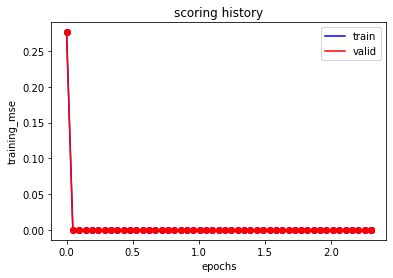

In [40]:
autoenc_history = autoencoder_model.score_history()

x = autoenc_history['epochs']
y = autoenc_history['training_mse']
plt.plot(x,y,'bo')
line1, = plt.plot(x,y,'b-')
y = autoenc_history['validation_mse']
plt.plot(x,y,'ro')
line2, = plt.plot(x,y,'r-')
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend((line1,line2),('train','valid'))
plt.xlabel('epochs')
plt.ylabel('training_mse')
plt.title('scoring history')
plt.show()

#평가

In [43]:
# 학습, 테스트셋에 대한 리컨스트럭션 에러 계산

recon_error_train = autoencoder_model.anomaly(hdf_train, per_feature=False)
df_recon_error_train = h2o.as_list(recon_error_train, use_pandas=True, header=True)
df_train = h2o.as_list(hdf_train, use_pandas=True, header=True)
df_recon_error_train['Ground-truth Class'] = df_train['Ground-truth Class']

recon_error_test = autoencoder_model.anomaly(hdf_test, per_feature=False)
df_recon_error_test = h2o.as_list(recon_error_test, use_pandas=True, header=True)
df_test = h2o.as_list(hdf_test, use_pandas=True, header=True)
df_recon_error_test['Ground-truth Class'] = df_test['Ground-truth Class']

print(df_recon_error_train.head(10))

x=list(df_recon_error_train.index)
y=df_recon_error_train['Reconstruction.MSE']
line1 = plt.plot(x,y,'b.')
plt.autoscale(enable=True, axis='both', tight=None)
plt.ylabel('Reconstruction Error MSE')
plt.title('Reconstruction Error')
plt.show()

   Reconstruction.MSE Ground-truth Class
0        1.139113e-07             normal
1        1.139113e-07             normal
2        1.139113e-07             normal
3        1.139113e-07             normal
4        1.139113e-07             normal
5        1.139113e-07             normal
6        1.139113e-07             normal
7        1.139113e-07             normal
8        1.139113e-07             normal
9        1.139113e-07             normal


#문턱치 계산 (q=0.999)

In [45]:
df_recon_error_train['Reconstruction.MSE'].quantile(q=0.999)

0.00034298703547705034

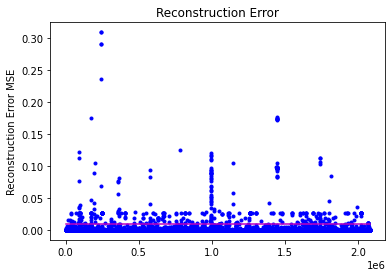

In [53]:
x=list(df_recon_error_train.index)
y=df_recon_error_train['Reconstruction.MSE']
line1, = plt.plot(x,y,'b.')
line2, = plt.plot([x[0],x[-1]],[0.01,0.01],'m-')
plt.autoscale(enable=True, axis='both', tight=None)
plt.ylabel('Reconstruction Error MSE')
plt.title('Reconstruction Error')
plt.show()

# 투비컨티뉴드

create new response labels based on our unsupervised model and unoptimized threshold
we'll store these labels in a new column

In [54]:
hdf_train['Reconstruction.MSE'] = recon_error_train['Reconstruction.MSE']
hdf_train['Unsupervised_Class'] = 'normal'
mask = hdf_train['Reconstruction.MSE'] > 0.02
hdf_train[mask,'Unsupervised_Class'] = 'anomaly'
hdf_train['Unsupervised_Class'] = hdf_train['Unsupervised_Class'].asfactor()

hdf_test['Reconstruction.MSE'] = recon_error_test['Reconstruction.MSE']
hdf_test['Unsupervised_Class'] = 'normal'
mask = hdf_test['Reconstruction.MSE'] > 0.02
hdf_test[mask,'Unsupervised_Class'] = 'anomaly'
hdf_test['Unsupervised_Class'] = hdf_test['Unsupervised_Class'].asfactor()

In [56]:
train_gb = hdf_train.group_by('Unsupervised_Class').count().get_frame()
mask = train_gb['Unsupervised_Class'] == 'anomaly'
print('%anomaly train split =' ,train_gb[mask,:]['nrow'][0,0]/hdf_train.shape[0]*100)
test_gb = hdf_test.group_by('Unsupervised_Class').count().get_frame()
mask = test_gb['Unsupervised_Class'] == 'anomaly'
print('%anomaly test split =' ,test_gb[mask,:]['nrow'][0,0]/hdf_test.shape[0]*100)

%anomaly train split = 0.012482212846693461
%anomaly test split = 0.011909815801252067


Now we'll set-up supervised learning with AutoML using the unsupervised predicted labels

In [59]:
y = 'Unsupervised_Class'
X = hdf_train.columns
X.remove(y)
X.remove('Unnamed: 0')
X.remove('a1.ucube_jnr_no')
X.remove('a2.firstlogtime')
X.remove('Ground-truth Class')
X.remove('Reconstruction.MSE')
X

['a2.buffer_overflow',
 'a2.pts_advanced_error',
 'a2.stb_rtp_errcnt',
 'a2.no_stream_error',
 'a2.not_decoding_error']

In [61]:
aml = H2OAutoML(max_runtime_secs=800,
                include_algos=['XGBoost','GBM','DRF'],
                nfolds=5,
                max_models=4,
                balance_classes=False,
                seed=42)
aml.train(x=X,
          y=y,
          training_frame=hdf_train,
          leaderboard_frame=hdf_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [62]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_20200703_072003,1,2.68979e-05,1,0,0.00196238,3.85095e-06
XGBoost_3_AutoML_20200703_072003,0.999999,0.0775232,1,0.00806548,0.0746191,0.00556801
XGBoost_2_AutoML_20200703_072003,0.991935,0.296332,0.999998,0.016129,0.256463,0.0657735
XGBoost_1_AutoML_20200703_072003,0.983871,0.0776167,0.999996,0.01613,0.0748086,0.00559632


Let's take a look at the confusion matrix of #1

In [63]:
model = h2o.get_model(lb[0,'model_id'])

confusion matrix for cross-validation (nfolds=5)

In [64]:
model.confusion_matrix(xval=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4375: 


,,anomaly,normal,Error,Rate
0,anomaly,256.0,4.0,0.0154,(4.0/260.0)
1,normal,1.0,2082703.0,0.0,(1.0/2082704.0)
2,Total,257.0,2082707.0,0.0,(5.0/2082964.0)


confusion maxtrix for test samples

In [65]:
test_results = model.predict(hdf_test)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [67]:
# we'll use the max f1 threshold (=0.625) for the xval samples
mask = test_results['normal'] > 0.625
test_results[mask,'predict'] = 'normal'
test_results[~mask,'predict'] = 'anomaly'

test_results['Ground-truth Class'] = hdf_test['Ground-truth Class']
test_results['Unsupervised_Class'] = hdf_test['Unsupervised_Class']

#convert to pandas dataframe
df_test_results = h2o.as_list(test_results, use_pandas=True, header=True)

In [68]:
df_test_results.head()

,predict,anomaly,normal,Ground-truth Class,Unsupervised_Class
0,normal,0.000013,0.999987,normal,normal
1,normal,0.000013,0.999987,normal,normal
2,normal,0.000013,0.999987,normal,normal
3,normal,0.000013,0.999987,normal,normal
4,normal,0.000013,0.999987,normal,normal


confusion matrix helper function

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

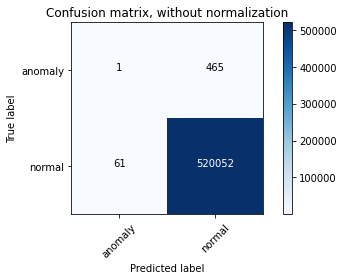

In [70]:
class_names = ['anomaly','normal']

cnf_matrix = confusion_matrix(df_test_results['Ground-truth Class'], df_test_results['Unsupervised_Class'], labels=class_names)
# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

Shapley explanantions

In [71]:
contributions = model.predict_contributions(hdf_test)

contributions.head(5)

contributions progress: |█████████████████████████████████████████████████| 100%


a2.buffer_overflow,a2.pts_advanced_error,a2.stb_rtp_errcnt,a2.no_stream_error,a2.not_decoding_error,BiasTerm
0.166667,0.166659,0.166696,0.166733,0.166669,0.166564
0.166667,0.166659,0.166696,0.166733,0.166669,0.166564
0.166667,0.166659,0.166696,0.166733,0.166669,0.166564
0.166667,0.166659,0.166696,0.166733,0.166669,0.166564
0.166667,0.166659,0.166696,0.166733,0.166669,0.166564


In [75]:
# convert the H2O Frame to use with shap's visualization functions
contributions_matrix = contributions.as_data_frame().as_matrix()
# shap values are calculated for all features
shap_values = contributions_matrix[:,0:-1]
# expected values is the last returned column
expected_value = contributions_matrix[:,-1].min()

TypeError: ignored

In [ ]:
X = df_test.iloc[:,1:-1]

find indices of the test set where both autoencoder and the model prediction are both 'anomaly'

In [ ]:
list1 = df_test_results.index[
        (df_test_results['Unsupervised_Class'] == 'anomaly') \
        & (df_test_results['predict'] == 'anomaly')
        ].tolist()

list1

we'll plot the force plots where the ground_truth and unsupervised both
- note: the plot is using javascript which may not render properly in github (click the link to the external nbviewer at the top right of the notebook)
- the variables in blue are pushing the model to predict 'anomaly'

In [ ]:
shap.initjs()
# visualize the prediction explanation
shap.force_plot(expected_value, shap_values[list1,:], X.iloc[list1,:])

It seems that V10 is often pushing the model towards predicting 'anomaly'

In [ ]:
plt.plot(range(0,df_test['V10'].shape[0]),df_test['V10'])
plt.plot(list1,df_test['V10'][list1],'r.')

plt.show()

check 'V10' vs 'V12' feature space

In [ ]:
plt.plot(df_test['V10'],df_test['V12'],'b.')
plt.plot(df_test['V10'][list1],df_test['V12'][list1],'r.')

plt.show()

Now we'll check model: XGBoost_3_AutoML_20190901_192640
- in general, we shouldn't expect the shapley values to be the exactly the same for different models

In [ ]:
model1 = h2o.get_model(lb[1,'model_id'])

In [ ]:
contributions = model.predict_contributions(hf_test)

In [ ]:
model1.confusion_matrix(xval=True)

In [ ]:
test_results = model.predict(hf_test)

In [ ]:
# we'll use the max f1 threshold (=0.54) for the xval samples
mask = test_results['normal'] > 0.54
test_results[mask,'predict'] = 'normal'
test_results[~mask,'predict'] = 'anomaly'

test_results['Ground-truth Class'] = hf_test['Ground-truth Class']
test_results['Unsupervised_Class'] = hf_test['Unsupervised_Class']

#convert to pandas dataframe
df_test_results = h2o.as_list(test_results, use_pandas=True, header=True)

In [ ]:
# convert the H2O Frame to use with shap's visualization functions
contributions_matrix = contributions.as_data_frame().as_matrix()
# shap values are calculated for all features
shap_values = contributions_matrix[:,0:-1]
# expected values is the last returned column
expected_value = contributions_matrix[:,-1].min()

In [ ]:
X = df_test.iloc[:,1:-1]

In [ ]:
list1 = df_test_results.index[
        (df_test_results['Unsupervised_Class'] == 'anomaly') \
        & (df_test_results['predict'] == 'anomaly')
        ].tolist()

In [ ]:
shap.initjs()
# visualize the prediction explanation
shap.force_plot(expected_value, shap_values[list1,:], X.iloc[list1,:])

check 'V10' vs 'V4' feature space

In [ ]:
plt.plot(df_test['V10'],df_test['V4'],'b.')
plt.plot(df_test['V10'][list1],df_test['V4'][list1],'r.')

plt.show()

In [ ]:
h2o.cluster().shutdown()